In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sa
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# set print precision
np.set_printoptions(precision=5, suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)




In [2]:
# load train data to build model
df = pd.read_csv('data/train.csv')
df.head()

,category,rating,reviews,installs,type,price,content_rating,app_size,last_updated_encoded
0,Business,4.30000,171771,10000000,Free,0.00000,Everyone,3.20000,2936
1,Tools,4.10000,981,100000,Free,0.00000,Everyone,0.07129,439
2,Family,4.30000,109,5000,Free,0.00000,Everyone,2.70000,2731
3,Family,4.30000,21,1000,Free,0.00000,Everyone,2.50000,2941
4,Libraries_And_Demo,4.30000,332083,10000000,Free,0.00000,Everyone,6.30000,3034


In [3]:
df.columns

Index(['category', 'rating', 'reviews', 'installs', 'type', 'price',
       'content_rating', 'app_size', 'last_updated_encoded'],
      dtype='object')

# Data Exploration
* Categorical, bar charts - Amee 
* Histograms - Flora
* Scatter plots matrix of all numeric variables - Sandy
* Correlation analysis for numeric variables (heatmap)  - Sandy 


# Bar Chats for Categorical Variables 

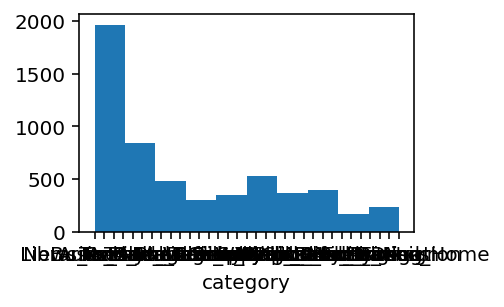

In [4]:
# Category 
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df['category'])
ax.set_xlabel("category")
plt.show()

In [10]:
# Which categories are the most popular? 
df.groupby('category').count().sort_values('reviews', ascending = False)

,rating,reviews,installs,type,price,content_rating,app_size,last_updated_encoded
category,,,,,,,,
Family,1254,1254,1254,1254,1254,1254,1254,1254
Game,660,660,660,660,660,660,660,660
Tools,486,486,486,486,486,486,486,486
Personalization,219,219,219,219,219,219,219,219
Medical,214,214,214,214,214,214,214,214
Finance,210,210,210,210,210,210,210,210
Lifestyle,204,204,204,204,204,204,204,204
Business,180,180,180,180,180,180,180,180
Productivity,180,180,180,180,180,180,180,180


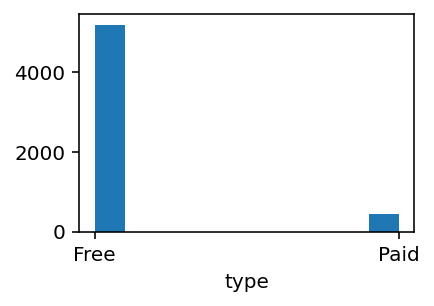

In [15]:
# Type of game (free vs paid)
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df['type'])
ax.set_xlabel('type')
plt.show()

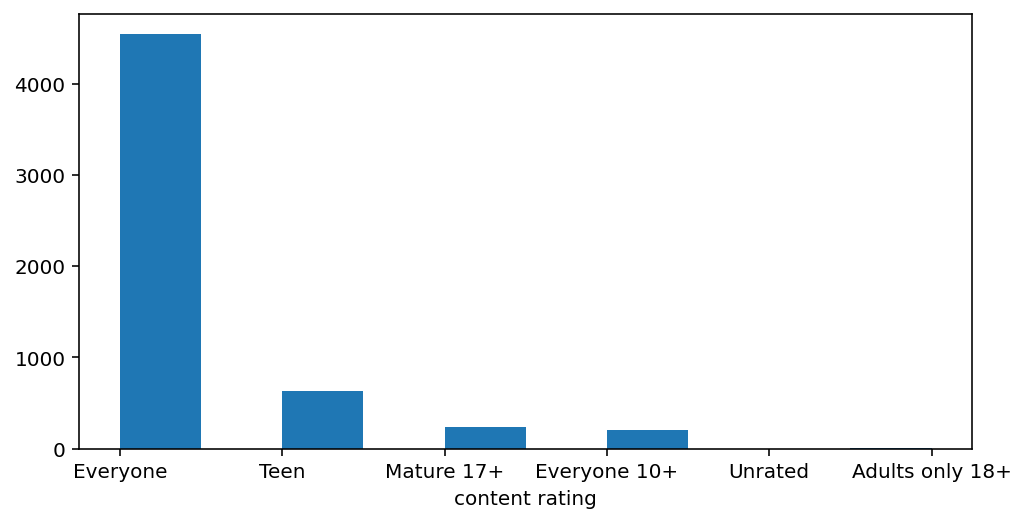

In [21]:
# Content rating 
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['content_rating'])
ax.set_xlabel('Content Rating')
plt.show()

# Initial model fit with all variables

In [28]:
# regress rating against all other variables
ystr = 'rating'
xstr = '+'.join([col for col in df.columns if col != ystr])

# build initial ols model 
model = smf.ols(f'{ystr}~{xstr}', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.362
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.09e-49
Time:                        20:36:35   Log-Likelihood:                -4525.3
No. Observations:                5623   AIC:                             9139.
Df Residuals:                    5579   BIC:                             9431.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# ANOVA

In [40]:
partial = sa.anova_lm(model, type=2)
seq = sa.anova_lm(model, type=1)

print('~~~~~~~ Partial ANOVA ~~~~~~~')
print(partial)

print('\n~~~~~~~ Sequential ANOVA ~~~~~~~')
print(seq)

~~~~~~~ Partial ANOVA ~~~~~~~
                             df     sum_sq  mean_sq         F  PR(>F)
category               32.00000   58.57447  1.83045   6.20283 0.00000
type                    1.00000    1.48364  1.48364   5.02760 0.02499
content_rating          5.00000    1.65630  0.33126   1.12254 0.34589
reviews                 1.00000    6.61363  6.61363  22.41152 0.00000
installs                1.00000    0.23373  0.23373   0.79205 0.37352
price                   1.00000    0.73689  0.73689   2.49708 0.11411
app_size                1.00000    1.42234  1.42234   4.81986 0.02817
last_updated_encoded    1.00000   35.39224 35.39224 119.93326 0.00000
Residual             5579.00000 1646.35997  0.29510       nan     nan

~~~~~~~ Sequential ANOVA ~~~~~~~
                             df     sum_sq  mean_sq         F  PR(>F)
category               32.00000   58.57447  1.83045   6.20283 0.00000
type                    1.00000    1.48364  1.48364   5.02760 0.02499
content_rating          5.

# Influential Points

In [33]:
# Lots of influential points 
infl = model.get_influence()
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d
atyp_cook = np.abs(reg_cook) >= 4/len(df)
print(df.index[atyp_cook],reg_cook[atyp_cook])

Int64Index([   7,   46,   49,   66,  170,  198,  202,  209,  226,  279,
            ...
            5443, 5457, 5477, 5503, 5516, 5539, 5541, 5565, 5573, 5594],
           dtype='int64', length=246) 7      0.00080
46     0.00175
49     0.00076
66     0.00142
170    0.00110
         ...  
5539   0.00309
5541   0.00077
5565   0.00080
5573   0.00093
5594   0.00227
Name: cooks_d, Length: 246, dtype: float64


# Normality 

## QQ Plot (Full model)

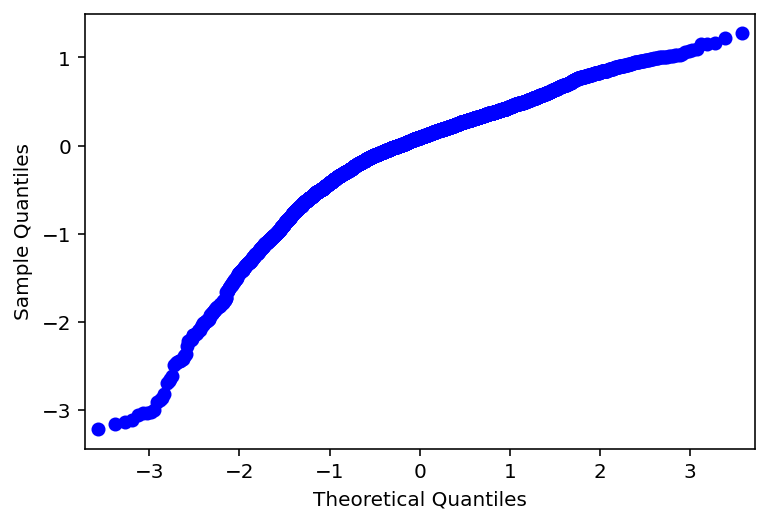

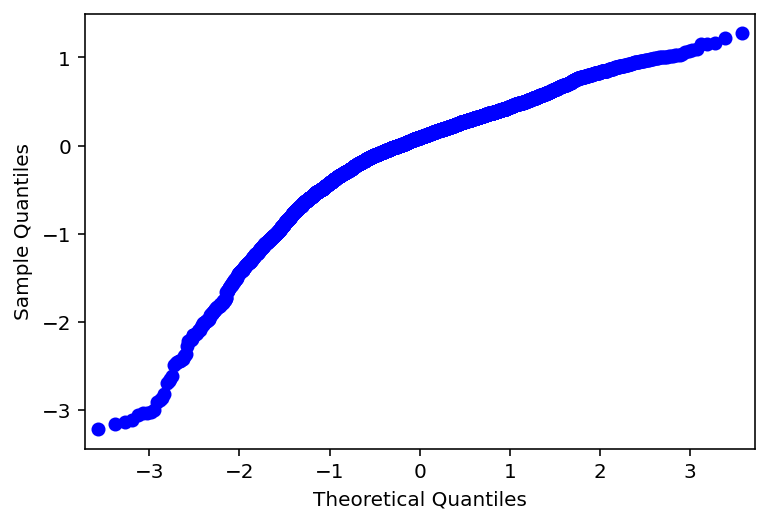

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sm.qqplot(model.resid)

## JB Test (Full model)
The JB value for the full model is 6665.484 with a p-value of zero. With a JB test, H0 states that the residuals are approximately normal and H1 states that residuals are not close to normal. Since our p-value for the JB stat is 0.000, we reject the null in favor of the alternate, stating that residuals are not close to normal